In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [130]:
def visualize_preds(y_true, y_pred,title):
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True)
    
    accuracy  = np.trace(cf) / float(np.sum(cf))

    # Metrics for Binary Confusion Matrices
    precision = cf[1,1] / sum(cf[:,1])
    recall    = cf[1,1] / sum(cf[1,:])
    f1_score  = 2 *precision * recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy,precision,recall,f1_score)
    
    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)

## Importing data

In [131]:
#IMPORTING CLEAN DATA USING RANDOM SAMPLING
train = pd.read_csv("data/train.csv", index_col=0)
train = train.drop(['revenue','decade_released','genres'], axis = 1)
train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,vote_count,is_good
5527,1.680,34.059,8.671,3300000.0,8,0
3263,18.013,46.018,9.456,26000000.0,200,0
1022,17.237,182.113,198.986,65000000.0,1122,0
4603,11.931,110.585,44.527,20000000.0,129,0
2733,14.717,99.835,75.898,51000000.0,405,0
...,...,...,...,...,...,...
4447,4.148,18.300,13.422,3230939.0,44,0
1479,16.122,72.172,50.678,40000000.0,2042,0
8772,1.712,43.027,8.754,577450.0,6,0
5071,16.830,103.881,108.412,15000000.0,974,0


In [132]:
#IMPORTING CLEANED TRAIN DATA USING RANDOM OVERSAMPLING SAMPLING
oversampling_train = pd.read_csv("data/oversampled-train.csv", index_col = 0)
oversampling_train = oversampling_train.drop(['revenue','genres','decade_released'], axis = 1)
oversampling_train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,vote_count,is_good
0,1.680,34.059,8.671,3300000.0,8,0
1,18.013,46.018,9.456,26000000.0,200,0
2,17.237,182.113,198.986,65000000.0,1122,0
3,11.931,110.585,44.527,20000000.0,129,0
4,14.717,99.835,75.898,51000000.0,405,0
...,...,...,...,...,...,...
5891,37.911,85.372,41.670,140000000.0,2929,1
5892,71.879,147.898,256.890,150000000.0,12834,1
5893,26.437,124.173,266.202,76000000.0,5173,1
5894,27.112,74.206,38.326,5000000.0,2951,1


In [133]:
#IMPORTING CLEANED TRAIN DATA USING SMOTEENN SAMPLING
smoteenn_train = pd.read_csv("data/smoteenn-train.csv", index_col = 0)
smoteenn_train = smoteenn_train.drop(['revenue'], axis = 1)
smoteenn_train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,vote_count,is_good
0,1.680000,34.059000,8.671000,3.300000e+06,8,0
1,11.931000,110.585000,44.527000,2.000000e+07,129,0
2,14.717000,99.835000,75.898000,5.100000e+07,405,0
3,12.050000,33.433000,10.263000,1.750000e+07,380,0
4,7.503000,36.672000,13.520000,1.600000e+05,51,0
...,...,...,...,...,...,...
3690,4.073709,4.324492,10.265746,1.488598e+05,109,1
3691,67.239940,80.192475,41.951580,1.549019e+07,7696,1
3692,21.451971,137.467166,43.816913,9.171183e+07,1708,1
3693,33.474275,118.201078,48.248315,1.265054e+07,5931,1


In [134]:
#IMPORTING CLEANED TRAIN DATA USING SMOTETOMEK SAMPLING
smotetomek_train = pd.read_csv("data/smotetomek-train.csv", index_col = 0)
smotetomek_train = smotetomek_train.drop(['revenue'], axis = 1)
smotetomek_train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,vote_count,is_good
0,1.680000,34.059000,8.671000,3.300000e+06,8,0
1,18.013000,46.018000,9.456000,2.600000e+07,200,0
2,11.931000,110.585000,44.527000,2.000000e+07,129,0
3,14.717000,99.835000,75.898000,5.100000e+07,405,0
4,23.357000,99.896000,62.278000,3.200000e+07,897,0
...,...,...,...,...,...,...
6857,21.451971,137.467166,43.816913,9.171183e+07,1708,1
6858,33.474275,118.201078,48.248315,1.265054e+07,5931,1
6859,26.421068,134.796016,25.145178,4.294768e+06,3132,1
6860,12.187359,37.095476,24.018535,3.327034e+06,622,1


In [135]:
#IMPORTING CLEANED TEST DATASETS
test = pd.read_csv("data/test.csv", index_col = 0)
test = test.drop(['revenue','genres','decade_released'], axis = 1)
test

,popularity,casts_popularity_sum,crews_popularity_sum,budget,vote_count,is_good
6183,10.639,53.101,21.680,5800000.0,28,0
786,48.052,100.519,97.495,60000000.0,3573,0
100,37.487,255.221,181.062,170000000.0,22271,1
4763,19.589,83.531,99.984,80000000.0,989,0
429,27.201,121.827,136.950,40000000.0,9474,1
...,...,...,...,...,...,...
1702,10.985,66.930,20.929,37000000.0,485,0
7958,2.867,20.298,5.676,1200000.0,14,0
5684,14.063,35.806,34.015,7000000.0,173,0
8122,4.678,11.597,5.905,10000000.0,13,0


## 1. Classification of train by Logistic Regression

In [136]:
#Assign x and y value
y_train = train['is_good']
x_train = train.drop(['is_good'], axis = 1) # Remove the response variable
y_test = test['is_good']
x_test = test.drop(['is_good'], axis = 1) # Remove the response variable

#The correlation of data
train.corr()

,popularity,casts_popularity_sum,crews_popularity_sum,budget,vote_count,is_good
popularity,1.000000,0.276604,0.262988,0.298602,0.307792,0.089654
casts_popularity_sum,0.276604,1.000000,0.547721,0.627959,0.592943,0.087012
crews_popularity_sum,0.262988,0.547721,1.000000,0.606373,0.624987,0.109554
budget,0.298602,0.627959,0.606373,1.000000,0.592316,0.001421
vote_count,0.307792,0.592943,0.624987,0.592316,1.000000,0.325379
is_good,0.089654,0.087012,0.109554,0.001421,0.325379,1.000000


In [137]:
#Perform the logistics regression
logreg1 = LogisticRegression()
 
#Fit the data
logreg1.fit(x_train,y_train)

#Print out the coefficient and intercept of the logistics function
#print("Logistic Regression")
#print("The coefficient (slope) of the function\t: ",  logreg1.coef_)
#print("The intercept of the line \t\t: ", logreg1.intercept_)
#print()

#Print out the mean acuuracy
print("The overall classification accuracy \t: ", logreg1.score(x_test,y_test))

The overall classification accuracy 	:  0.7906647807637907


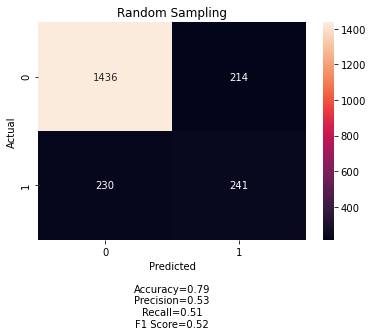

In [138]:
#Predict the data
y_test_pred = logreg1.predict(x_test)

#Visualizing the data
visualize_preds(y_test,y_test_pred, title = 'Random Sampling')

## 2. Classification of oversampling train by Logistic Regression

In [139]:
#Perform the logistics regression
logreg_oversampling = LogisticRegression()
 
#Fit the data
logreg_oversampling.fit(x_train,y_train)

"""
Same as before, no need coeff or intercept
"""

#Print out the coefficient and intercept of the logistics function
print("Logistic Regression")
print("The coefficient (slope) of the function\t: ",  logreg_oversampling.coef_)
print("The intercept of the line \t\t: ", logreg_oversampling.intercept_)
print()

#Print out the mean acuuracy
print("The overall classification accuracy \t: ", logreg_oversampling.score(x_test,y_test))

Logistic Regression
The coefficient (slope) of the function	:  [[-3.16205019e-07 -8.86579013e-06 -1.44453733e-06 -4.71248300e-08
   4.27433055e-04]]
The intercept of the line 		:  [-2.6354155e-07]

The overall classification accuracy 	:  0.7906647807637907


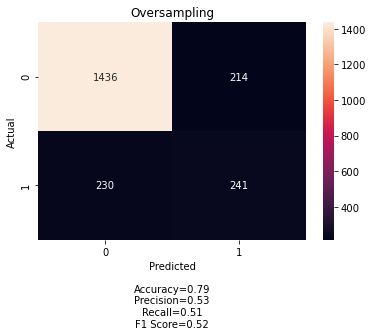

In [140]:
#Predict the data
y_test_pred = logreg_oversampling.predict(x_test)

#Visualizing the data
visualize_preds(y_test,y_test_pred,'Oversampling')

## 3.Classification of smoteenn train using Logistic Regression

In [142]:
#Perform the logistics regression
logreg_smoteenn = LogisticRegression()
 
#Fit the data
logreg_smoteenn.fit(x_train,y_train)

#Print out the coefficient and intercept of the logistics function
#print("Logistic Regression")
#print("The coefficient (slope) of the function\t: ",  logreg_smoteenn.coef_)
#print("The intercept of the line \t\t: ", logreg_smoteenn.intercept_)
#print()

#Print out the mean acuuracy
print("The overall classification accuracy \t: ", logreg_smoteenn.score(x_test,y_test))

The overall classification accuracy 	:  0.7906647807637907


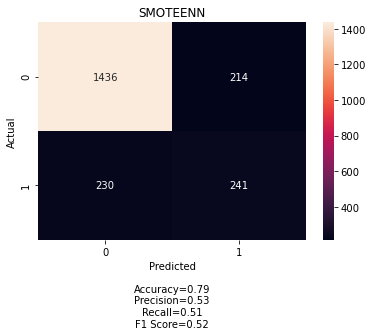

In [143]:
#Predict the data
y_test_pred = logreg_smoteenn.predict(x_test)

#Visualizing the data
visualize_preds(y_test,y_test_pred, 'SMOTEENN')

## 4. Classification of smotetomek train using Logistic Regression

In [144]:
#Perform the logistics regression
logreg_smotetomek = LogisticRegression()
 
#Fit the data
logreg_smotetomek.fit(x_train,y_train)

#Print out the coefficient and intercept of the logistics function
#print("Logistic Regression")
#print("The coefficient (slope) of the function\t: ",  logreg_smotetomek.coef_)
#print("The intercept of the line \t\t: ", logreg_smotetomek.intercept_)
#print()

#Print out the mean acuuracy
print("The overall classification accuracy \t: ", logreg_smotetomek.score(x_test,y_test))

The overall classification accuracy 	:  0.7906647807637907


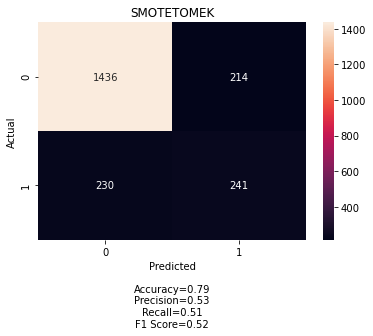

In [145]:
#Predict the data
y_test_pred = logreg_smotetomek.predict(x_test)

#Visualizing the data
visualize_preds(y_test,y_test_pred, 'SMOTETOMEK')